In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('adult_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip().str.replace('-', '_').str.replace(' ', '_')

# Convert relevant columns to numeric
cols_to_convert = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(subset=cols_to_convert, inplace=True)


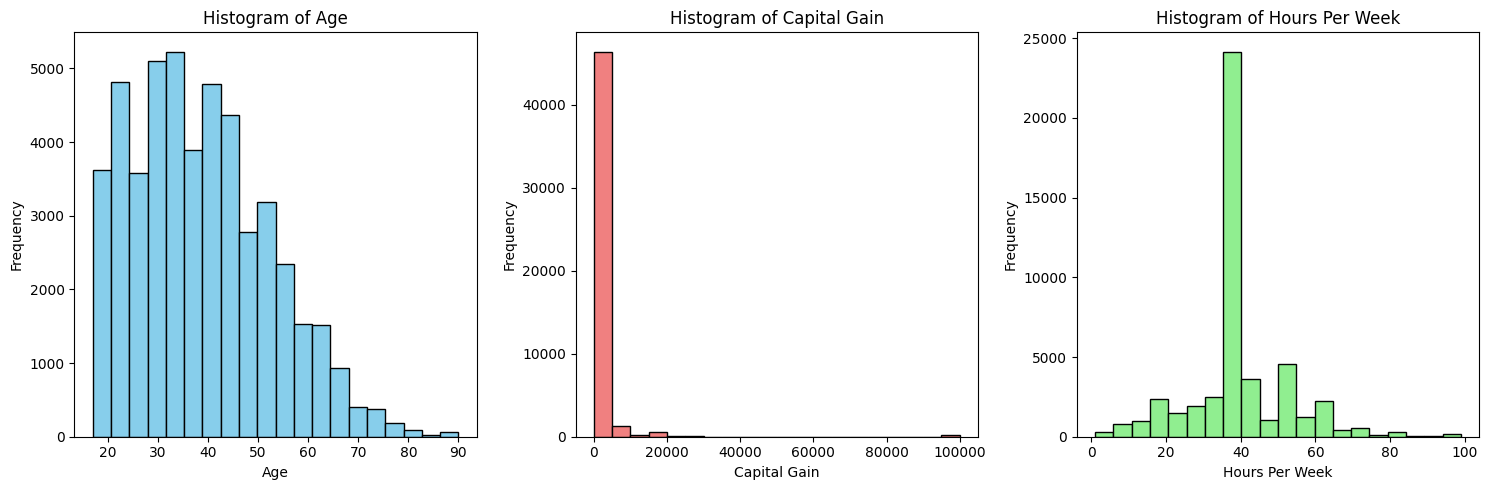

In [2]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['capital_gain'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['hours_per_week'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Hours Per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


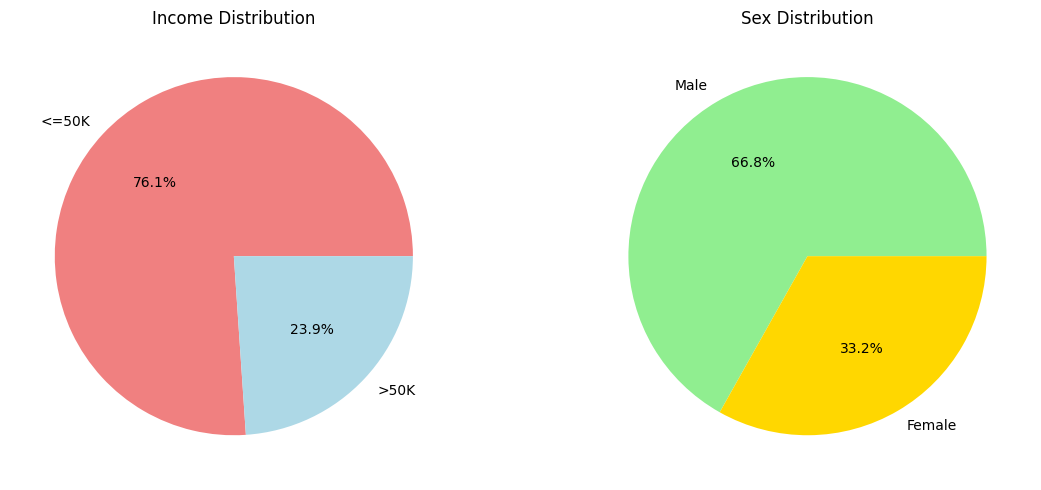

In [3]:
plt.figure(figsize=(12, 5))

# Pie for Income (Target)
plt.subplot(1, 2, 1)
df['income'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Income Distribution')
plt.ylabel('')

# Pie for Sex
plt.subplot(1, 2, 2)
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'gold'])
plt.title('Sex Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


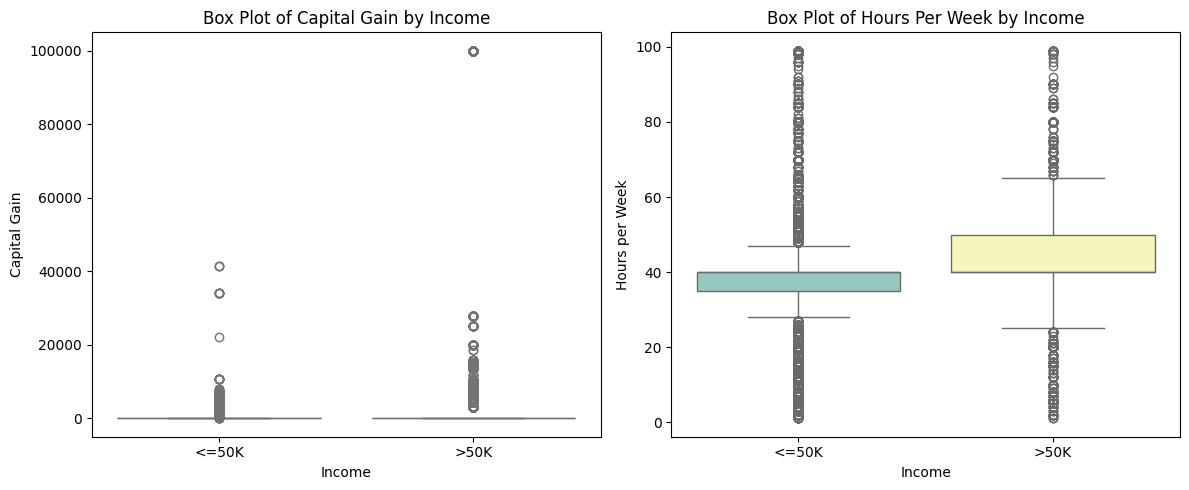

In [4]:
plt.figure(figsize=(12, 5))

# Box Plot of Capital Gain by Income
plt.subplot(1, 2, 1)
sns.boxplot(x='income', y='capital_gain', hue='income', data=df, palette='pastel', dodge=False, legend=False)
plt.title('Box Plot of Capital Gain by Income')
plt.xlabel('Income')
plt.ylabel('Capital Gain')

# Box Plot of Hours Per Week by Income
plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='hours_per_week', hue='income', data=df, palette='Set3', dodge=False, legend=False)
plt.title('Box Plot of Hours Per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')

plt.tight_layout()
plt.show()


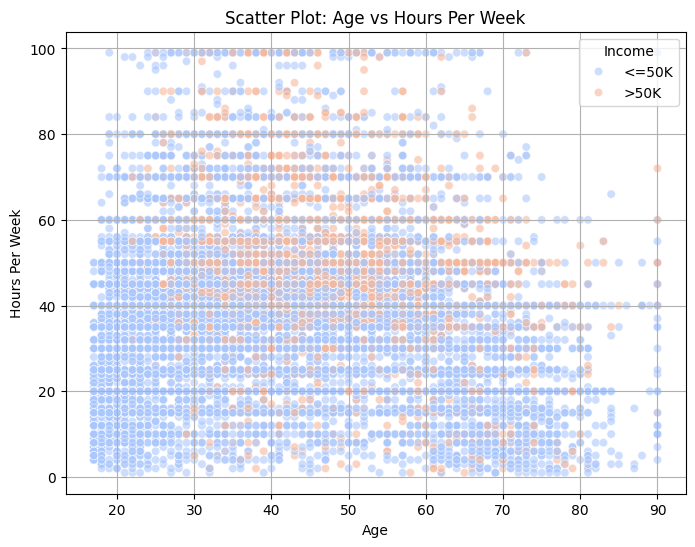

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='hours_per_week', hue='income', data=df, palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot: Age vs Hours Per Week')
plt.xlabel('Age')
plt.ylabel('Hours Per Week')
plt.legend(title='Income')
plt.grid(True)
plt.show()


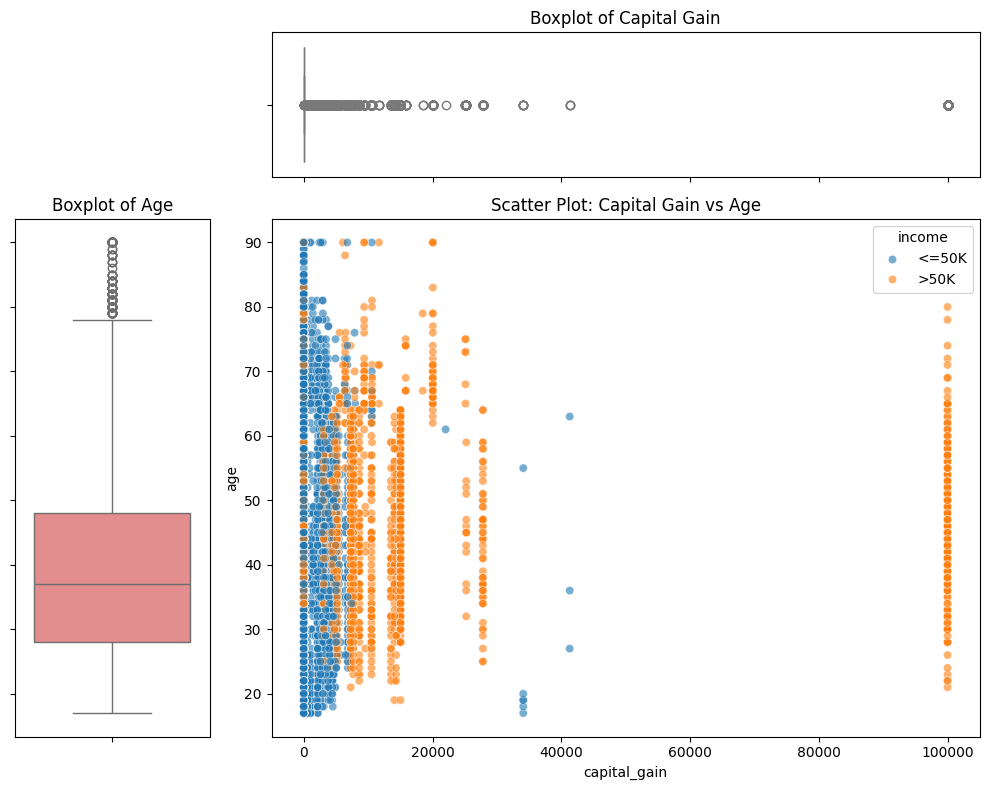

In [6]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(10, 8))
gs = GridSpec(4, 4)

# Boxplot for Capital Gain (top)
ax1 = plt.subplot(gs[0, 1:])
sns.boxplot(x=df['capital_gain'], ax=ax1, color='lightblue')
ax1.set(title='Boxplot of Capital Gain')
ax1.set_xticklabels([])
ax1.set_xlabel('')

# Scatter plot (middle)
ax2 = plt.subplot(gs[1:, 1:])
sns.scatterplot(x='capital_gain', y='age', hue='income', data=df, alpha=0.6)
ax2.set(title='Scatter Plot: Capital Gain vs Age')

# Boxplot for Age (left)
ax3 = plt.subplot(gs[1:, 0])
sns.boxplot(y=df['age'], ax=ax3, color='lightcoral')
ax3.set(title='Boxplot of Age')
ax3.set_yticklabels([])
ax3.set_ylabel('')

plt.tight_layout()
plt.show()
